In [234]:
# Step 1:import the important libraries
import pandas as pd
import numpy as np

# Step 2: load the Titanic dataset
# (upload file from kaggle)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 3: first view of data(Storytelling start!)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
# 1. find and check the data
print("Missing values in each column:")
print(df.isnull().sum())

# 2. fill the mmissing value age column
# because machine cannot get empty space
df['Age'] = df['Age'].fillna(df['Age'].median())

# 3. 'Embarked' (from where to bording the people in ship)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 4. 'Cabin' column there are bulk data is missing, so we can remove it at the time
df.drop(columns=['Cabin'], inplace=True)

print("\nData get clean!")

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data get clean!


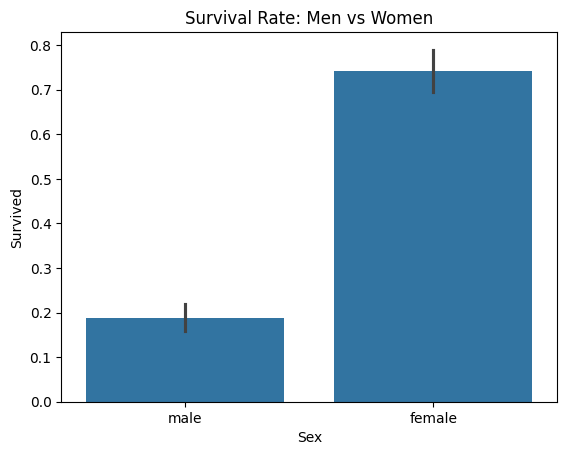

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# predict the survival rate of passenger based on gender(Dark Reality)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate: Men vs Women')
plt.show()

In [237]:
# 1. change 'Sex' column into number(Male = 1, Female = 0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 2. 'Embarked' column (from passenger boarding) change into the number
# S=0, C=1, Q=2 (we can use get_dummies or we can use mapping)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 3. (Storytelling and extra garbage found)
# Name aur Ticket number not related to the death of passenger
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

print("Data Machine is ready now!")
print(df.head())

Data Machine is ready now!
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False        True
4         0       3    1  35.0      0      0   8.0500       False        True


In [238]:
from sklearn.model_selection import train_test_split

# 1. 'X' means features (Class, Sex, Age, etc.) and 'y' means target (Survived)
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2.data has been seperated by  80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing data is ready now!")

Training and Testing data is ready now!


In [239]:
from sklearn.ensemble import RandomForestClassifier

# 1. calling the Model
model = RandomForestClassifier(n_estimators=100)

# 2. teaching the Model (Training)
model.fit(X_train, y_train)

print("Machine get learn about the data who alive and who died!")

Machine get learn about the data who alive and who died!


In [240]:
from sklearn.metrics import accuracy_score

# 1. Test data prediction
predictions = model.predict(X_test)

# 2. Accuracy check
accuracy = accuracy_score(y_test, predictions)
print(f"Machine ki Accuracy: {accuracy * 100:.2f}%")

Machine ki Accuracy: 83.24%


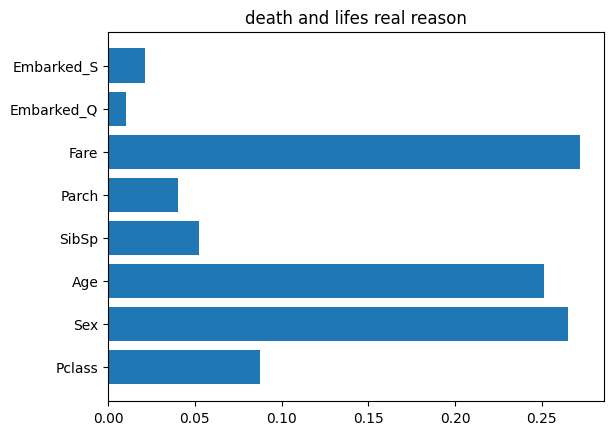

In [241]:
import matplotlib.pyplot as plt

# analyze which feature is important in it
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("death and lifes real reason")
plt.show()

In [242]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Average Accuracy: {scores.mean() * 100:.2f}%")

Average Accuracy: 80.81%


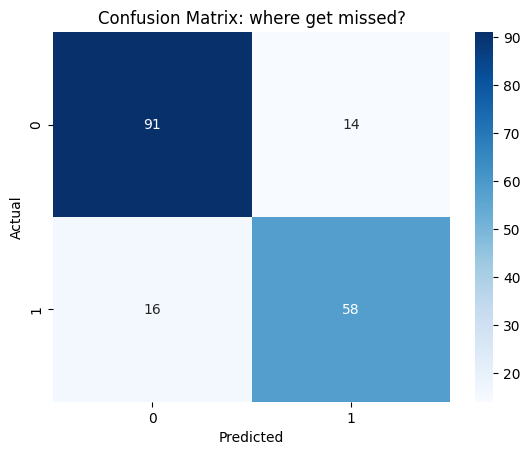

In [243]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: where get missed?')
plt.show()

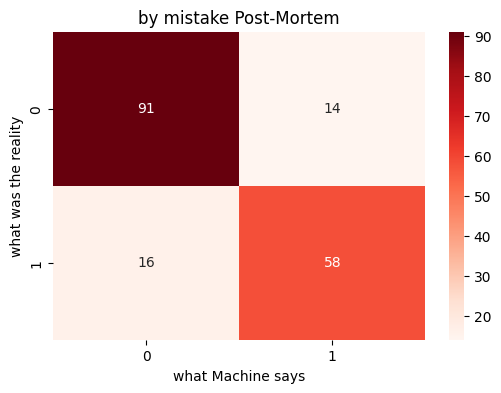

In [244]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions and actual value comparison
cm = confusion_matrix(y_test, predictions)

# for hitmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('what Machine says')
plt.ylabel('what was the reality')
plt.title('by mistake Post-Mortem')
plt.show()